## Observations and Insights 

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 

# Study data files
mouse = "mouse.csv"
study = "study.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse)
study = pd.read_csv(study)

# Combine the data into a single dataset
data_df = pd.merge(study, mouse, how="outer", on=["Mouse ID", "Mouse ID"])

#Dropping any unknown values from the data set 
data_df = data_df.dropna(how='any')

# Display the data table for preview
data_df 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [5]:
#Printing a statistical overview of the data set 
data_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [6]:
# Checking the number of mice.
mouse_count = data_df['Mouse ID'].count()
#Creating a bin for the mouse count 
mouse_bin = {'Mouse Count':[mouse_count]}

#Creating a dataframe for the count 
mouse_bin = pd.DataFrame(mouse_bin)

#Displaying the dataframe
mouse_bin 

,Mouse Count
0,1893


In [117]:
# Getting the duplicate mice by ID number that shows up for Mouse ID Timepoint. 
unique_mice = data_df[data_df.duplicated(["Mouse ID","Timepoint"])]

unique_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [125]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop_duplicates(['Mouse ID','Timepoint'],keep='last').sort_index()

#Displaying the dat frame 
clean_data_df.head(80)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
75,b559,25,57.043669,1,Naftisol,Male,20,26
76,b559,30,61.190387,1,Naftisol,Male,20,26
77,b559,35,65.705763,1,Naftisol,Male,20,26
78,b559,40,69.969616,1,Naftisol,Male,20,26


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_count = clean_data_df['Mouse ID'].count()

#Binning and Renaming the columns in the DataFrame 
clean_count_bin = {'Mouse Count':[clean_count]}

#Creating the DataFrame
clean_count_bin = pd.DataFrame(clean_count_bin)

#Displaying the DataFrame 
clean_count_bin

,Mouse Count
0,1888



## Summary Statistics

In [11]:
#Calulating the Standard Error Mean for Tumor Volume for each Drug Regimen
sem_data = clean_data_df.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

#Setting a variable equal to the calculated SEM
sem_summary = sem_data

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_table = clean_data_df.groupby(['Drug Regimen']).agg({"Tumor Volume (mm3)":
                                                          [np.mean, 
                                                           np.median, 
                                                           np.var, 
                                                           np.std,
                                                          ]
                                                         })

#Creating a dataframe 
stat_table = pd.DataFrame(stat_table)

#Adding SEM Column into the Summary Statistics table
stat_table['SEM of Tumor Volume (mm3)'] = sem_summary

#Dropping a level of the multi-index that was created from the agg function
stat_table.columns = stat_table.columns.droplevel()

#Renaming my column headers to give the data the correct labels
stat_table = stat_table.rename(columns={"mean":"Mean",
                                       "median":"Median",
                                       "var":"Variance",
                                       "std":"Std. Deviation",
                                       "":"SEM"})


#Adding a comment to give the table a Name 
stat_table.style.set_caption("TUMOR VOLUME (MM3) SUMMARY STATISTICS")

,Mean,Median,Variance,Std. Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

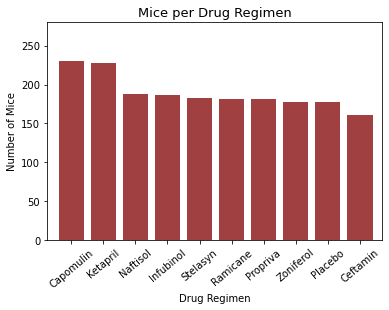

In [72]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#Grabbing a count of mice from the cleaned up dataframe without duplicates 
mouse_count = data_df['Drug Regimen'].value_counts()

#unique strings for drug regimen 
drug_reg = data_df['Drug Regimen'].unique()

#Sets the x-axis labels to the unique drug regimen names listed in the data set 
x_axis = np.arange(0, len(drug_reg))

#empty that will hold the x-axis tick locations 
tick_locations = [] 

#for loop that will store each unique drug regiment on the x-axis 
for x in x_axis: 
    tick_locations.append(x)

#giving title/labels to the bar grap using pyplot 
plt.title("Mice per Drug Regimen",fontsize=13,fontweight='light')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#Setting the x limits of the bar graph
plt.xlim(-.75, len(drug_reg)-.30)

#counter space for our y-axis 
plt.ylim(0, max(mouse_count)+50)

#styling the graph 
plt.bar(x_axis, mouse_count,facecolor="maroon",alpha=0.75, align="center")


#assigning tick values generated from our for loop 
plt.xticks(tick_locations,drug_reg, fontsize=10,rotation=40,horizontalalignment="center")

#showing the graph 
plt.show()

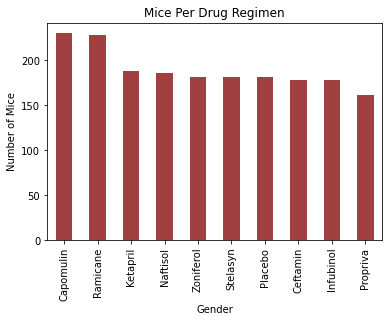

In [120]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#Using the data generated from the previous cell
panda_bar_chart = mouse_count.plot(kind="bar",color="maroon",alpha=0.75,title="Mice Per Drug Regimen")

#labeling my x axis 
panda_bar_chart.set_xlabel("Gender")

#labeling my y axis 
panda_bar_chart.set_ylabel("Number of Mice")

#showing my graph 
plt.show()

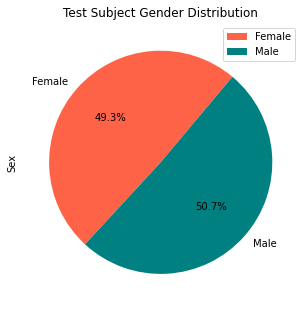

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = clean_data_df.groupby('Sex')

#Putting the gender count into a dataFrame 
gender_count = pd.DataFrame(gender_groups['Sex'].count())

colors = ["tomato","teal"]


#Creating and displaying our pie chart 
pie_chart = gender_count.plot.pie(y="Sex",colors=colors,title="Test Subject Gender Distribution",autopct='%1.1f%%', figsize=(5,8),
                                 shadow=False,startangle=50
                                )

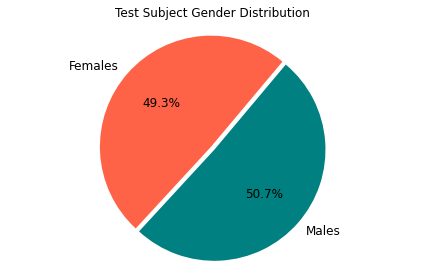

<Figure size 432x288 with 0 Axes>

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt_labels = ["Females","Males"]

#Since we know that count we can avoid an error message by manually entering the count
#for male and femal into a list array 
plt_gender = [930,958]

#Setting my pie chart colors 
colors = ["tomato","teal"]

#Telling matplotlib to separate female from male group 
explode = (0.02,0)

#Creating the pie chart 
plt.pie(plt_gender,explode=explode, labels=plt_labels, colors=colors, autopct="%1.1f%%",shadow=False,startangle=50,radius=.5,
       textprops={'size':'larger'})

#adding title 
plt.title("Test Subject Gender Distribution")

#Telling matplot lib that we want a pie chart with equal axes 
plt.axis("equal")

plt.tight_layout()

#Displaying our pie chart 
plt.show()

plt.savefig("MousePyPloyt.png")

## Quartiles, Outliers and Boxplots

In [132]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement

tumor_group = clean_data_df.groupby(['Drug Regimen','Mouse ID']).last()['Tumor Volume (mm3)']

tumor_group.head()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Drug Regimen  Mouse ID
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
